In [1]:
import pandas as pd

(16710, 65)
         Value   Wage
0      €107.5M  €250K
1         €93M  €140K
2       €44.5M  €135K
3      €125.5M  €350K
4         €37M   €45K
...        ...    ...
16705    €100K    €1K
16706    €180K   €550
16707    €100K   €700
16708    €110K   €500
16709       €0     €0

[16710 rows x 2 columns]


<AxesSubplot: >

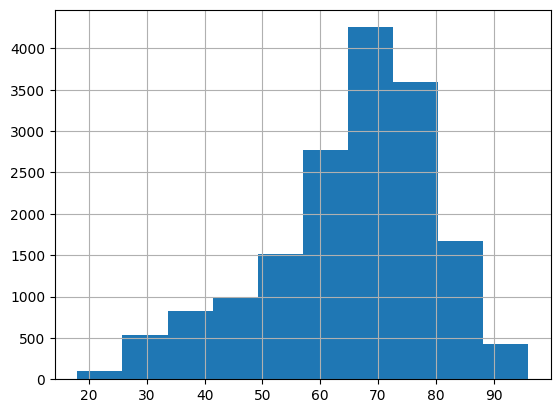

In [2]:
df = pd.read_csv("C:/Users/14058/OneDrive/Desktop/Programming/Python Stuff/Machine Learning/FIFA22_official_data.csv")
print(df.shape) # 65 columns and 16710 rows
df.describe() # returns statistical information about the dataset such as mean, standard deviation, min/max, etc.
print(df[["Value", "Wage"]]) # returns values from the two columns specified
df.sort_values("Agility", ascending = False)
df["Agility"].hist()


In [3]:
print(len(df))
photo_links_arr = df['Photo'].head(10).values # grab the first 10 links and save it to an array
for link in photo_links_arr:
    print(link)
len(df[df["ID"] > 250000]) # to filter out all values in the ID column greater than 250000
df.iloc[0,:] # gets the first row in the dataframe(the first number before the comma controls which row to get)

16710
https://cdn.sofifa.com/players/212/198/22_60.png
https://cdn.sofifa.com/players/209/658/22_60.png
https://cdn.sofifa.com/players/176/580/22_60.png
https://cdn.sofifa.com/players/192/985/22_60.png
https://cdn.sofifa.com/players/224/334/22_60.png
https://cdn.sofifa.com/players/212/622/22_60.png
https://cdn.sofifa.com/players/187/961/22_60.png
https://cdn.sofifa.com/players/181/291/22_60.png
https://cdn.sofifa.com/players/208/333/22_60.png
https://cdn.sofifa.com/players/194/765/22_60.png


ID                                                               212198
Name                                                    Bruno Fernandes
Age                                                                  26
Photo                  https://cdn.sofifa.com/players/212/198/22_60.png
Nationality                                                    Portugal
                                             ...                       
GKReflexes                                                         14.0
Best Position                                                       CAM
Best Overall Rating                                                88.0
Release Clause                                                  €206.9M
DefensiveAwareness                                                 72.0
Name: 0, Length: 65, dtype: object

In [12]:
# Grab the player with the highest market value but one that has the lowest salary
names, mv, wages = df["Name"].values, df["Value"].values, df["Wage"].values
# print(str(len(names)) + ", " + str(len(mv)) + ", " + str(len(wages)))

# Process market-value array
for i in range(len(mv)):
    if (isinstance(mv[i], float)):
        mv[i] = mv[i] * 1000000.0
    elif (isinstance(mv[i], str)):
        curr = mv[i].split('€')[1]
        if ('M' in curr):
            mv[i] = float(curr[0:-1]) * 1000000.0
        elif ('K' in curr):
            mv[i] = float(curr[0:-1]) * 100000.0
        else:
            mv[i] = float(curr)

# Process wages array
for j in range(len(wages)):
    if (isinstance(wages[j], str)):
        wage = wages[j].split('€')[1]
        if ('K' not in wage):
            wages[j] = float(wage)
        else:
            wages[j] = float(wage[0:-1]) * 1000.0
    else:
        pass

df["Value"], df["Wage"] = mv, wages
modified_df = df.sort_values(["Value", "Wage"], ascending = [False, True])
player = modified_df.iloc[0,1].replace('\xa0', ' ')
player = player[player.index(' ') + 1:]
print(f'The player with the highest market cap and the least salary is {player} with jersey number {int(modified_df.iloc[0,21])}')

The player with the highest market cap and the least salary is Fernandes with jersey number 18
